Q1-1

(1000, 2) (1000,)


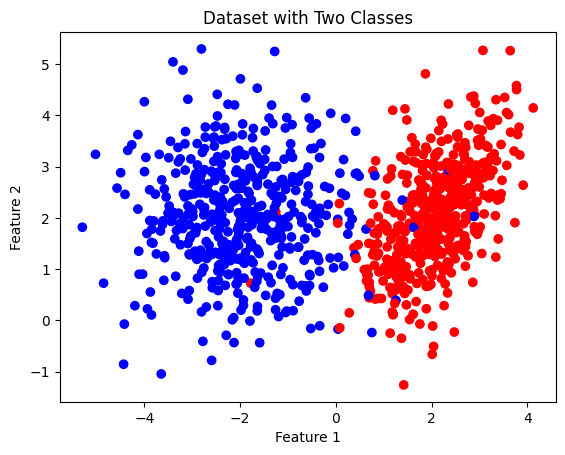

In [ ]:
# Generate dataset => 1000 samples, 2 classes, 2 features
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           class_sep=2,
                           random_state=13)
print(X.shape, y.shape)

# plotting dataset
colors = np.array(['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Two Classes')
plt.show()


Q1-2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           class_sep=2,
                           random_state=13)

# split train test datas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

##LogisticRegression
model = LogisticRegression(random_state=13)
model.fit(x_train, y_train)   #train
model_predict = model.predict(x_test)   #test...it gives us y_hat_test
log_accuracy = accuracy_score(y_test, model_predict)   # accuracy
print("Logistic Regression Accuracy:", log_accuracy)

##SGDClassifier()
model1 = SGDClassifier(loss='log_loss', random_state=13)
model1.fit(x_train, y_train)              #train
model1_predict = model1.predict(x_test)   #test
SGD_accuracy = accuracy_score(y_test, model1_predict)            #accuracy
print("SGD Classifier Accuracy:", SGD_accuracy)


Logistic Regression Accuracy: 0.99
SGD Classifier Accuracy: 0.975


Q1-3

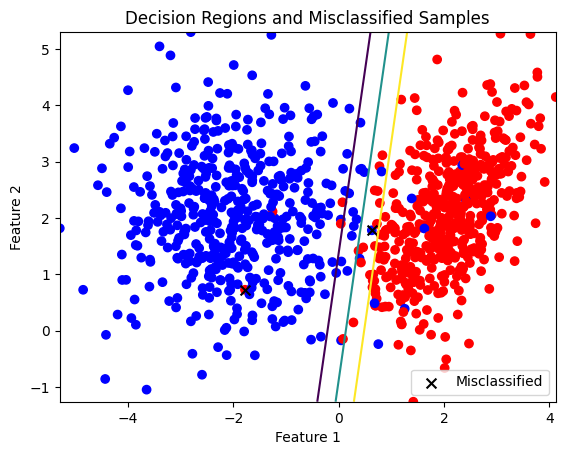

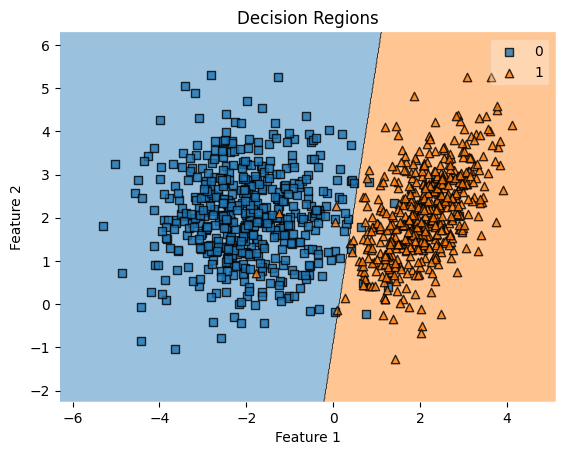

In [ ]:
## for LogisticRegression

# Determine the minimum and maximum values for each feature
x1_min, x2_min = X.min(0)
x1_max, x2_max = X.max(0)
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)
Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
# Calculate decision values for specific points in the space
ym = model.decision_function(Xm)

# assign colors to classes (0 for blue, 1 for red)
colors = np.array(['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
# Plot decision boundary
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[-1,0,1])
# Display misclassified samples with a different color
misclassified = (y_test != model_predict)
plt.scatter(x_test[misclassified, 0], x_test[misclassified, 1], c='black', marker='x', s=50, label='Misclassified')

plt.title('Decision Regions and Misclassified Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## direct command
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model)
plt.title('Decision Regions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Q1-4

(1000, 2) (1000,)


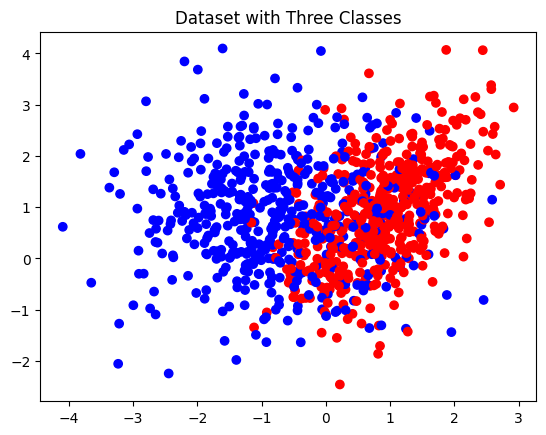

Logistic Regression Accuracy: 0.82
SGD Classifier Accuracy: 0.775


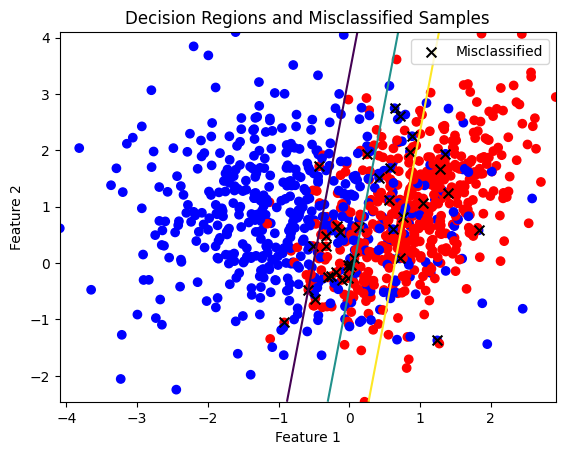

<Axes: title={'center': 'Decision Regions'}>

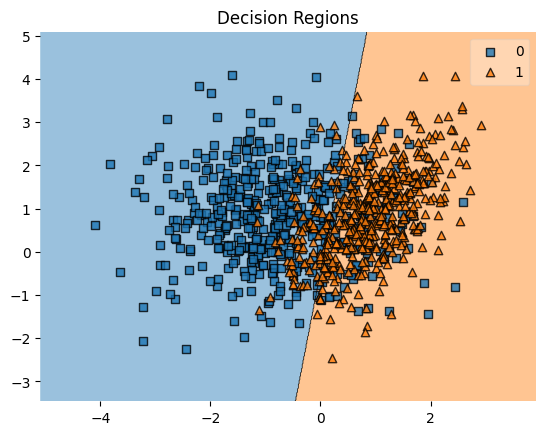

In [ ]:
# subtract class_sep

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Generate Data
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=13
)

print(X.shape, y.shape)
colors = np.array(['blue', 'red', 'green'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.title('Dataset with Three Classes')
plt.show()

## Part 2 ##
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


# check the shape of data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

##LogisticRegression
model = LogisticRegression(random_state=13)
model.fit(x_train, y_train)   #train
model_predict = model.predict(x_test)   #test...it gives us y_hat_test
log_accuracy = accuracy_score(y_test, model_predict)   #accuracy
print("Logistic Regression Accuracy:", log_accuracy)

##SGDClassifier
model1 = SGDClassifier(loss='log_loss', random_state=13)
model1.fit(x_train, y_train)     #train
model1_predict = model1.predict(x_test)   #test
SGD_accuracy = accuracy_score(y_test, model1_predict)            #accuracy
print("SGD Classifier Accuracy:", SGD_accuracy)

## Part 3 ##
# Determine the minimum and maximum values for each feature
x1_min, x2_min = X.min(0)
x1_max, x2_max = X.max(0)
n = 500
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m, x2m = np.meshgrid(x1r, x2r)
Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
# Calculate decision values for specific points in the space
ym = model.decision_function(Xm)

# assign colors to classes (0 for blue, 1 for red)
colors = np.array(['blue', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
# Plot decision boundary
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[-1,0,1])
# Display misclassified samples with a different color
misclassified = (y_test != model_predict)
plt.scatter(x_test[misclassified, 0], x_test[misclassified, 1], c='black', marker='x', s=50, label='Misclassified')

plt.title('Decision Regions and Misclassified Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

###
from mlxtend.plotting import plot_decision_regions
plt.title('Decision Regions')
plot_decision_regions(X, y, clf=model)


Q1-5

(1000, 2) (1000,)


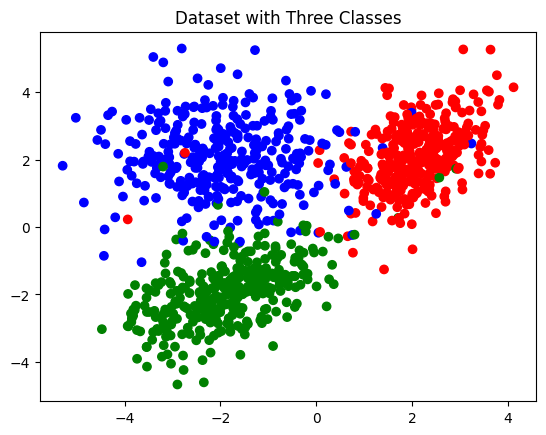

Logistic Regression Accuracy: 0.96


<Axes: title={'center': 'Decision Regions'}>

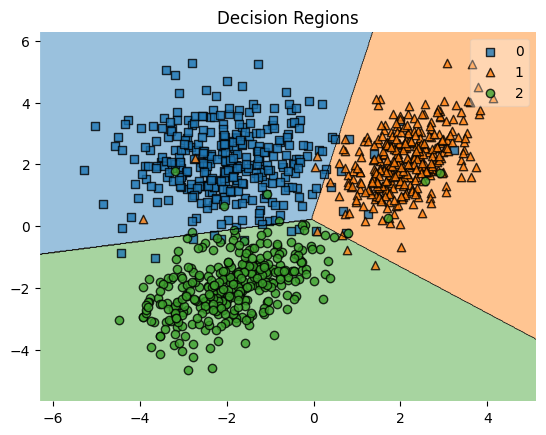

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=13
)

print(X.shape, y.shape)
colors = np.array(['blue', 'red', 'green'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.title('Dataset with Three Classes')
plt.show()

## Part 2 ##
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# check the shape of  data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

## Logistic Regression
model = LogisticRegression(random_state=13)
model.fit(x_train, y_train)   #train
model_predict = model.predict(x_test)   #test...it gives us y_hat_test
log_accuracy = accuracy_score(y_test, model_predict)   #accuracy
print("Logistic Regression Accuracy:", log_accuracy)

## Part 3 ##

from mlxtend.plotting import plot_decision_regions
plt.title('Decision Regions')
plot_decision_regions(X, y, clf=model)



